<a href="https://colab.research.google.com/github/natancarvalho/Kaggle_House_Prices_Advanced_Regression_Techniques/blob/main/C%C3%B3pia_de_Kaggle_House_Prices_Advanced_Regression_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df_dataset = pd.read_csv("/content/train.csv")
df_dataset.shape

(1460, 81)

In [ ]:
df_dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df_dataset = df_dataset.drop('Id', axis=1)
df_dataset.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [ ]:
df_dataset = df_dataset.drop(columns=['Alley', 'MiscFeature', 'FireplaceQu', 'PoolQC', 'Fence'])


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
correlation = df_dataset.corr(numeric_only=True)

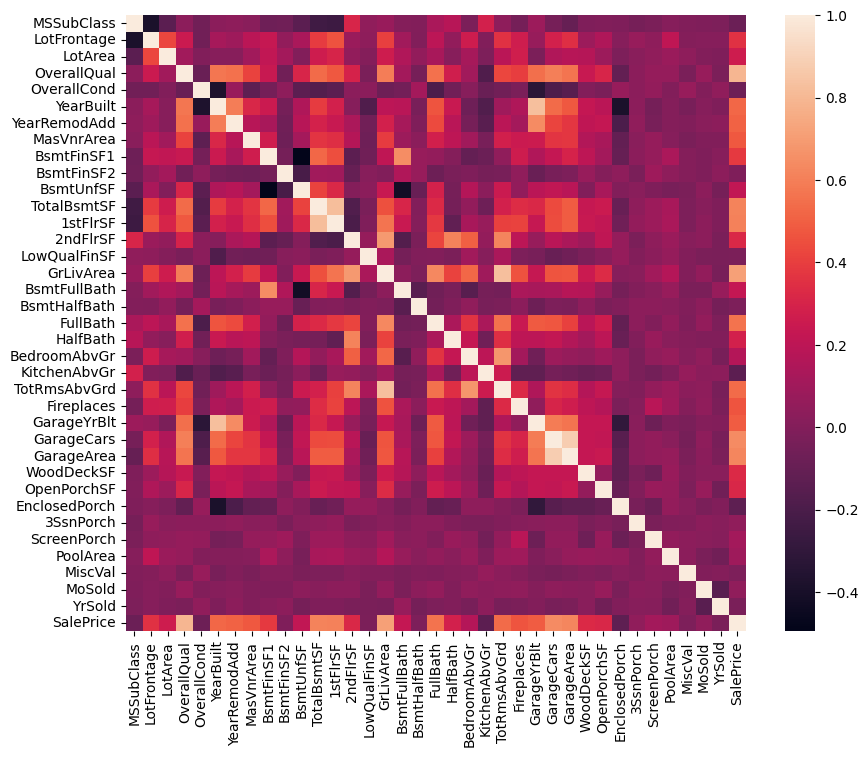

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sn.heatmap(correlation)
plt.show()

In [ ]:
correlation_price =  df_dataset.corr(numeric_only=True).sort_values(by='SalePrice', ascending=False)[['SalePrice']]
correlation_price

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


 **Irei fazer um teste primeiro ignorando variáveis categóricas e aplicando Regressão Linear, Ridge e Lasso.**


**Primeiro, farei a seperação dos data frames somente com variáveis numéricas**

In [ ]:
df_numeric = df_dataset.select_dtypes(include = ['float64', 'int64'])
df_numeric.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


**Agora, irei separar os conjuntos de treino e teste.**


In [ ]:
target = 'SalePrice'
atributes = df_numeric.drop(columns=[target])
result = df_numeric[target]

In [ ]:
from sklearn.model_selection import train_test_split

atributes_train, atributes_test, result_train, result_test = train_test_split(atributes, result, test_size=0.2, random_state=42)
print("atributes_train shape:", atributes_train.shape)
print("result_train shape:", result_train.shape)
print("atributes_test:", atributes_test.shape)
print("result_test shape:", result_test.shape)

atributes_train shape: (1168, 36)
result_train shape: (1168,)
atributes_test: (292, 36)
result_test shape: (292,)


**1. Regressão Linear**

In [ ]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression , Ridge , Lasso
from sklearn.impute import SimpleImputer

linearregression = make_pipeline(
    SimpleImputer(missing_values=np.nan, strategy='mean'),
    LinearRegression()
    )

linearregression.fit(atributes_train, result_train)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('linearregression', LinearRegression())])

**Calculando o Erro Médio Absoluto**

In [ ]:
from sklearn.metrics import mean_absolute_error , r2_score

mean_absolute_error(result_train , linearregression.predict(atributes_train))

21074.83224863519

**Avaliando a Regressão Linear somente com atributos numéricos**

In [ ]:
reg_result_pred_train = linearregression.predict(atributes_train)
reg_result_pred_test = linearregression.predict(atributes_test)

reg_acc_train = r2_score(result_train , reg_result_pred_train)
reg_acc_test = r2_score(result_test , reg_result_pred_test)

print("Training Accuracy:", round(reg_acc_train, 4))
print("Test Accuracy:", round(reg_acc_test, 4))

Training Accuracy: 0.807
Test Accuracy: 0.8231


**2.Ridge**

In [ ]:
ridge = make_pipeline(
    SimpleImputer(missing_values=np.nan, strategy='mean'),
    Ridge()
)

ridge.fit(atributes_train, result_train)

Pipeline(steps=[('simpleimputer', SimpleImputer()), ('ridge', Ridge())])

**Calculando o Erro Médio Absoluto**

In [ ]:
mean_absolute_error(result_train , ridge.predict(atributes_train))

21067.646206201563

**Avaliando a função Ridge apenas com atributos numéricos.**

In [ ]:
ridge_result_pred_train = ridge.predict(atributes_train)
ridge_result_pred_test = ridge.predict(atributes_test)

ridge_acc_train = r2_score(result_train , ridge_result_pred_train)
ridge_acc_test = r2_score(result_test , ridge_result_pred_test)

print("Training Accuracy:", round(ridge_acc_train, 4))
print("Test Accuracy:", round(ridge_acc_test, 4))

Training Accuracy: 0.807
Test Accuracy: 0.8232


**3.Lasso**

In [ ]:
lasso = make_pipeline(
    SimpleImputer(missing_values=np.nan, strategy='mean'),
    Lasso(max_iter=2000)
)

lasso.fit(atributes_train, result_train)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('lasso', Lasso(max_iter=2000))])

**Calculando o Erro Médio Absoluto**

In [ ]:
mean_absolute_error(result_train , lasso.predict(atributes_train))

21073.973053268524

**Avaliando a Função Lasso apenas com atributos numéricos**

In [ ]:
lasso_result_pred_train = lasso.predict(atributes_train)
lasso_result_pred_test = lasso.predict(atributes_test)

lasso_acc_train = r2_score(result_train , lasso_result_pred_train)
lasso_acc_test = r2_score(result_test , lasso_result_pred_test)

print("Training Accuracy:", round(lasso_acc_train, 4))
print("Test Accuracy:", round(lasso_acc_test, 4))

Training Accuracy: 0.807
Test Accuracy: 0.8232


**O desempenho das três funções foi básicamente o mesmo, irei adicionar agora as variáveis categoricas e comparar os resultados. Por fim, escolherei o melhor.**

**Separando o dataset em treino e teste novamente.**

In [ ]:
target = 'SalePrice'
atributes = df_dataset
result = df_dataset[target]

In [ ]:
atributes_train, atributes_test, result_train, result_test = train_test_split(atributes, result, test_size=0.2, random_state=42)
print("atributes_train shape:", atributes_train.shape)
print("result_train shape:", result_train.shape)
print("atributes_test:", atributes_test.shape)
print("result_test shape:", result_test.shape)

atributes_train shape: (1168, 75)
result_train shape: (1168,)
atributes_test: (292, 75)
result_test shape: (292,)


**2.Linear Regression Full Dataset**

In [ ]:
import seaborn as sns
from category_encoders import OneHotEncoder , OrdinalEncoder

linearregression = make_pipeline(
    OneHotEncoder(use_cat_names= True),
    SimpleImputer(missing_values=np.nan, strategy='mean'),
    LinearRegression()
    )

linearregression.fit(atributes_train, result_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['MSZoning', 'Street', 'LotShape',
                                     'LandContour', 'Utilities', 'LotConfig',
                                     'LandSlope', 'Neighborhood', 'Condition1',
                                     'Condition2', 'BldgType', 'HouseStyle',
                                     'RoofStyle', 'RoofMatl', 'Exterior1st',
                                     'Exterior2nd', 'MasVnrType', 'ExterQual',
                                     'ExterCond', 'Foundation', 'BsmtQual',
                                     'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                                     'BsmtFinType2', 'Heating', 'HeatingQC',
                                     'CentralAir', 'Electrical', 'KitchenQual', ...],
                               use_cat_names=True)),
                ('simpleimputer', SimpleImputer()),
                ('linearregression', LinearRegression())])

**Calculando o Erro Absoluto Médio**

In [ ]:
mean_absolute_error(result_train , linearregression.predict(atributes_train))

6.631213082447138e-11

**Avaliando a Regressão Linear com atributos categóricos**

In [ ]:
reg_result_pred_train = linearregression.predict(atributes_train)
reg_result_pred_test = linearregression.predict(atributes_test)

reg_acc_train = r2_score(result_train , reg_result_pred_train)
reg_acc_test = r2_score(result_test , reg_result_pred_test)

print("Training Accuracy:", round(reg_acc_train, 4))
print("Test Accuracy:", round(reg_acc_test, 4))

Training Accuracy: 1.0
Test Accuracy: 1.0


**2.Ridge Full Dataset**

In [ ]:
ridge = make_pipeline(
    OneHotEncoder(),
    SimpleImputer(missing_values=np.nan, strategy='mean'),
    Ridge()
)

ridge.fit(atributes_train, result_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['MSZoning', 'Street', 'LotShape',
                                     'LandContour', 'Utilities', 'LotConfig',
                                     'LandSlope', 'Neighborhood', 'Condition1',
                                     'Condition2', 'BldgType', 'HouseStyle',
                                     'RoofStyle', 'RoofMatl', 'Exterior1st',
                                     'Exterior2nd', 'MasVnrType', 'ExterQual',
                                     'ExterCond', 'Foundation', 'BsmtQual',
                                     'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                                     'BsmtFinType2', 'Heating', 'HeatingQC',
                                     'CentralAir', 'Electrical', 'KitchenQual', ...])),
                ('simpleimputer', SimpleImputer()), ('ridge', Ridge())])

**Calculando o Erro Médio Absoluto**

In [ ]:
mean_absolute_error(result_train , ridge.predict(atributes_train))

2.21961122967003e-08

**Avaliando a Função Ridge com atributos categóricos**

In [ ]:
ridge_result_pred_train = ridge.predict(atributes_train)
ridge_result_pred_test = ridge.predict(atributes_test)

ridge_acc_train = r2_score(result_train , ridge_result_pred_train)
ridge_acc_test = r2_score(result_test , ridge_result_pred_test)

print("Training Accuracy:", round(ridge_acc_train, 4))
print("Test Accuracy:", round(ridge_acc_test, 4))

Training Accuracy: 1.0
Test Accuracy: 1.0


**3. Lasso Full Dataset**

In [ ]:
lasso = make_pipeline(
    OneHotEncoder(),
    SimpleImputer(),
    Lasso(max_iter=2000)
)

lasso.fit(atributes_train, result_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['MSZoning', 'Street', 'LotShape',
                                     'LandContour', 'Utilities', 'LotConfig',
                                     'LandSlope', 'Neighborhood', 'Condition1',
                                     'Condition2', 'BldgType', 'HouseStyle',
                                     'RoofStyle', 'RoofMatl', 'Exterior1st',
                                     'Exterior2nd', 'MasVnrType', 'ExterQual',
                                     'ExterCond', 'Foundation', 'BsmtQual',
                                     'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                                     'BsmtFinType2', 'Heating', 'HeatingQC',
                                     'CentralAir', 'Electrical', 'KitchenQual', ...])),
                ('simpleimputer', SimpleImputer()),
                ('lasso', Lasso(max_iter=2000))])

**Calculando o Erro Médio Absoluto**

In [ ]:
mean_absolute_error(result_train , lasso.predict(atributes_train))

0.02089498691926465

**Avaliando a Função Lasso com atributos categóricos**

In [ ]:
lasso_result_pred_train = lasso.predict(atributes_train)
lasso_result_pred_test = lasso.predict(atributes_test)

lasso_acc_train = r2_score(result_train , lasso_result_pred_train)
lasso_acc_test = r2_score(result_test , lasso_result_pred_test)

print("Training Accuracy:", round(lasso_acc_train, 4))
print("Test Accuracy:", round(lasso_acc_test, 4))

Training Accuracy: 1.0
Test Accuracy: 1.0


**Novamente, as três funções obtiveram desempenho parecidos. Confesso que não entendi o motivo e precisaria de uma analise exploratória mais profunda. De qualquer forma, estarei escolhedo a Função Ridge aleatóriamente.**

**Salvando o Modelo Escolhido**

In [ ]:

pd.DataFrame(ridge_result_pred_test).to_csv('RidgeResult.csv')